In [1]:
import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

import pickle

from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [81]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)
df_test_features = pd.read_csv('kc_house_data_test_features.csv', index_col=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12813f390>]],
      dtype=object)

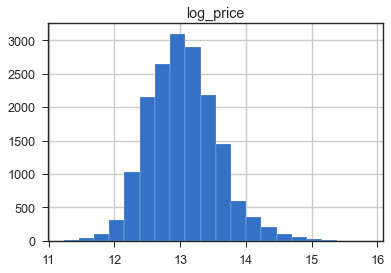

In [85]:
sns.set_style('ticks')
df['log_price'] = df['price'].apply(lambda x: np.log(x))
df.hist('log_price', bins=20)

In [86]:
df_untouched = pd.read_csv('kc_house_data_train.csv', index_col=0)

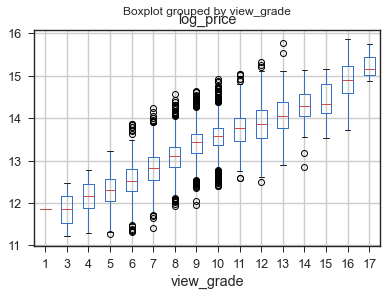

In [87]:
df['view_grade'] = df['view'] + df['grade']
df.boxplot('log_price', 'view_grade')

In [73]:
categorical = ['floors', 'waterfront', 'condition', 'view_grade', 'zipcode']
continuous = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
price = df['log_price']

In [5]:
cont_data = df[continuous]
cat_data = df[categorical]

KeyError: 'Column not found: log_price'

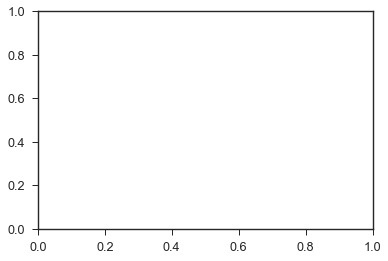

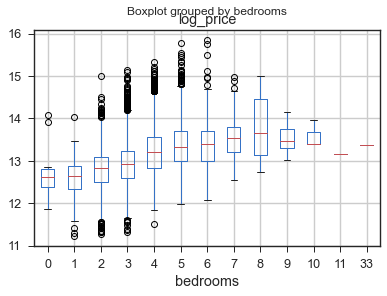

In [14]:
df.boxplot('log_price', 'bedrooms')

In [15]:
df['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [16]:
conditions = [df['bedrooms'] == 0, df['bedrooms'] > 7]
choices = [1, 7]

df['bedrooms'] = np.select(conditions, choices, df['bedrooms'])

In [17]:
df['bedrooms'].value_counts()

3    7864
4    5488
2    2204
5    1283
6     229
1     172
7      50
Name: bedrooms, dtype: int64

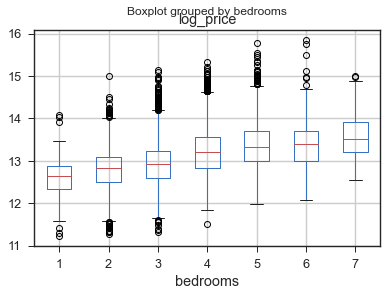

In [18]:
df.boxplot('log_price', 'bedrooms')

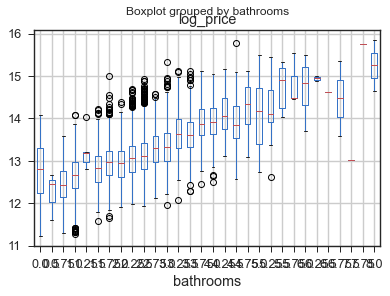

In [19]:
df.boxplot('log_price', 'bathrooms')

In [20]:
df['bathrooms'].unique()

array([2.25, 3.  , 2.5 , 3.5 , 2.  , 1.  , 1.75, 3.75, 3.25, 4.25, 2.75,
       1.5 , 4.5 , 4.  , 4.75, 0.75, 0.  , 5.  , 5.5 , 6.  , 1.25, 5.75,
       6.75, 5.25, 6.5 , 8.  , 7.5 , 6.25, 0.5 , 7.75])

In [21]:
conditions = [df['bathrooms'] <= 1, df['bathrooms'] <= 1.75,
              df['bathrooms'] <= 2, df['bathrooms'] <= 2.75,
              df['bathrooms'] <= 3, df['bathrooms'] <= 3.75,
              df['bathrooms'] <= 4, df['bathrooms'] <= 4.75]
choices = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

df['bathrooms'] = np.select(conditions, choices, 5)

In [22]:
df['bathrooms'].value_counts()

2.5    6884
1.5    3605
1.0    3163
2.0    1549
3.5    1181
3.0     592
4.5     156
4.0     107
5.0      53
Name: bathrooms, dtype: int64

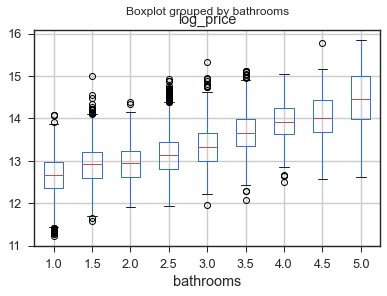

In [23]:
df.boxplot('log_price', 'bathrooms')

In [24]:
df['living_bed_ratio'] = df['sqft_living'] / df['bedrooms']

In [25]:
df['living_bed_ratio'] = np.where(df['living_bed_ratio'] == np.inf,
                                  df['living_bed_ratio'].min(), df['living_bed_ratio'])


In [26]:
df['log_living_bed_ratio'] = df['living_bed_ratio'].apply(lambda x: np.log(x))

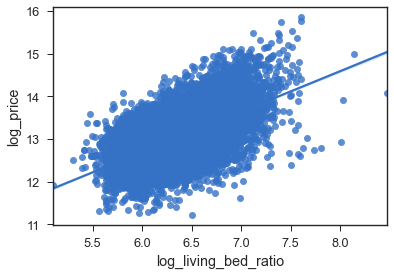

In [27]:
sns.regplot(df['log_living_bed_ratio'], df['log_price'])

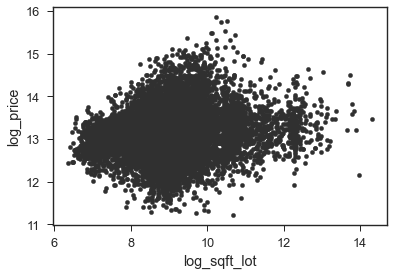

In [28]:
df['log_sqft_lot'] = df['sqft_lot'].apply(lambda x: np.log(x))
df.plot.scatter('log_sqft_lot', 'log_price')

In [29]:
df['sqft_yard'] = df['sqft_lot'] - (df['sqft_living'] / df['floors'])
df['sqft_yard'] = np.where(df['sqft_yard'] < 0, df['sqft_yard'].median(), df['sqft_yard'])
df['sqft_yard'].min(), df['sqft_yard'].max()

(21.66666666666663, 1650059.0)

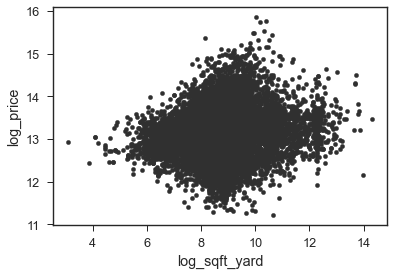

In [30]:
df['log_sqft_yard'] = df['sqft_yard'].apply(lambda x: np.log(x))
df.plot.scatter('log_sqft_yard', 'log_price')

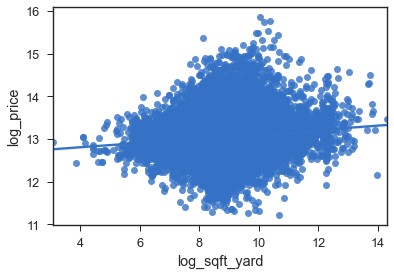

In [31]:
sns.regplot(df['log_sqft_yard'], df['log_price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127031978>]],
      dtype=object)

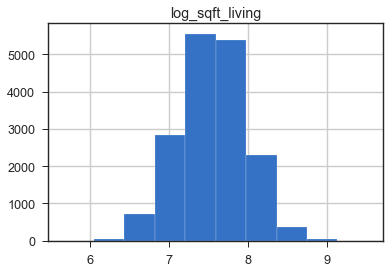

In [32]:
df['log_sqft_living'] = df['sqft_living'].apply(lambda x: np.log(x))
df.hist('log_sqft_living')

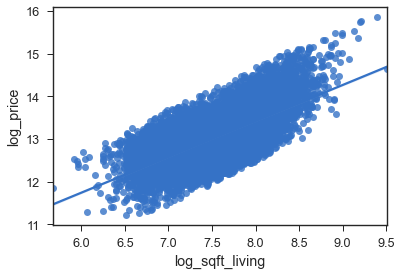

In [33]:
sns.regplot(df['log_sqft_living'], df['log_price'])

In [34]:
f = 'log_price~log_sqft_living+log_sqft_yard'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     7534.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        13:47:57   Log-Likelihood:                -8034.7
No. Observations:               17290   AIC:                         1.608e+04
Df Residuals:                   17287   BIC:                         1.610e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8665      0.053    128.748      0.000       6.762       6.971
log_sqft_living     0.8720      0.007    121.413      0.000       0.858       0.886
log_sqft_yard      -0.0461      0.003    -15.821      0.000      -0.052      -0.040
==============================================================================
Omnibus:                       77.310   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.161
Skew:                           0.154   Prob(JB):                     1.76e-17
Kurtosis:                       2.890   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
df['yr_built_reno'] = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])
df['yr_built_reno'].describe()

count    17290.000000
mean      1973.158010
std         28.805976
min       1900.000000
25%       1954.000000
50%       1977.000000
75%       1999.000000
max       2015.000000
Name: yr_built_reno, dtype: float64

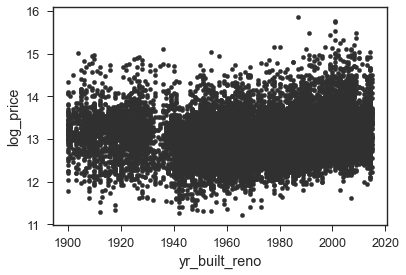

In [36]:
df.plot.scatter('yr_built_reno', 'log_price')

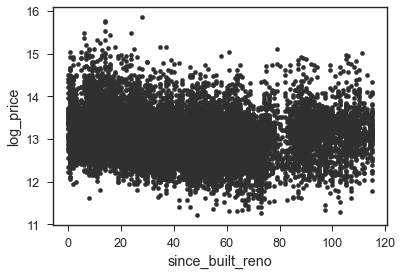

In [37]:
df['since_built_reno'] = df['yr_built_reno'].apply(lambda x: 2015 - x)
df.plot.scatter('since_built_reno', 'log_price')

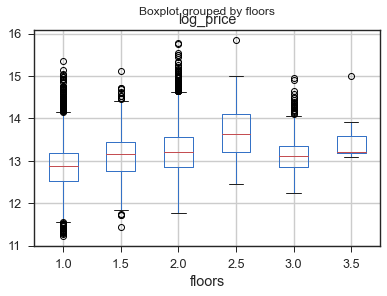

In [38]:
df.boxplot('log_price', 'floors')

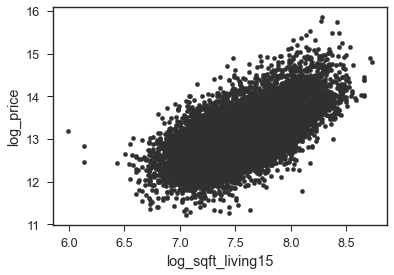

In [39]:
df['log_sqft_living15'] = df['sqft_living15'].apply(lambda x: np.log(x))
df.plot.scatter('log_sqft_living15', 'log_price')

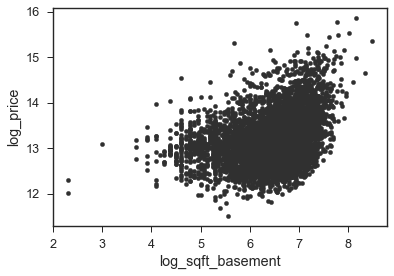

In [40]:
df['log_sqft_basement'] = df['sqft_basement'].apply(lambda x: np.log(x))
df.plot.scatter('log_sqft_basement', 'log_price')

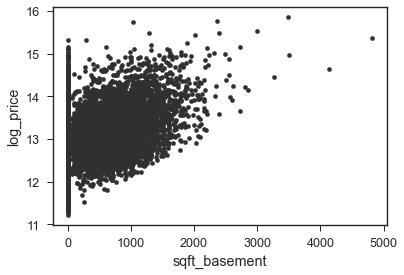

In [41]:
df.plot.scatter('sqft_basement', 'log_price')

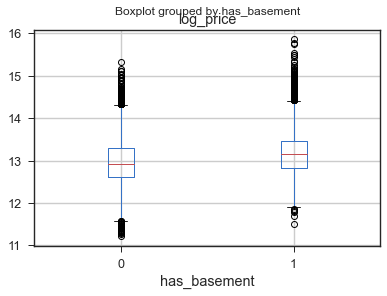

In [42]:
df['has_basement'] = np.where(df['sqft_basement'] == 0, 0, 1)
df.boxplot('log_price', 'has_basement')

In [43]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price',
       'waterfront_view', 'waterfront_cond', 'waterfront_grade', 'view_grade',
       'living_bed_ratio', 'log_living_bed_ratio', 'log_sqft_lot', 'sqft_yard',
       'log_sqft_yard', 'log_sqft_living', 'yr_built_reno', 'since_built_reno',
       'log_sqft_living15', 'log_sqft_basement', 'has_basement'],
      dtype='object')

In [44]:
columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'zipcode', 'view_grade']
df = pd.get_dummies(data=df, columns=columns, prefix=columns, drop_first=True)
df.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       ...
       'view_grade_8', 'view_grade_9', 'view_grade_10', 'view_grade_11',
       'view_grade_12', 'view_grade_13', 'view_grade_14', 'view_grade_15',
       'view_grade_16', 'view_grade_17'],
      dtype='object', length=151)

In [45]:
floor_dict = {
            'floors_1.5': 'floors_1_half',
            'floors_2.0': 'floors_2',
            'floors_2.5': 'floors_2_half',
            'floors_3.0': 'floors_3',
            'floors_3.5': 'floors_3_half'
}

df = df.rename(columns=floor_dict)

In [46]:
print(df.columns)

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       ...
       'view_grade_8', 'view_grade_9', 'view_grade_10', 'view_grade_11',
       'view_grade_12', 'view_grade_13', 'view_grade_14', 'view_grade_15',
       'view_grade_16', 'view_grade_17'],
      dtype='object', length=151)


In [47]:
bath_dict = {
            'bathrooms_1.0': 'bathrooms_1',
            'bathrooms_1.5': 'bathrooms_1_half',
            'bathrooms_2.0': 'bathrooms_2',
            'bathrooms_2.5': 'bathrooms_2_half',
            'bathrooms_3.0': 'bathrooms_3',
            'bathrooms_3.5': 'bathrooms_3_half',
            'bathrooms_4.0': 'bathrooms_4',
            'bathrooms_4.5': 'bathrooms_4_half',
            'bathrooms_5.0': 'bathrooms_5'
}

df = df.rename(columns=bath_dict)

In [48]:
df.shape

(17290, 151)

In [49]:
df_untouched.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [50]:
untouched_cats = '+'.join(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                           'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
                           'yr_renovated', 'sqft_living15', 'sqft_lot15'])

In [51]:
f_untouched = 'price~' + untouched_cats
model_untouched = ols(formula=f_untouched, data=df_untouched).fit()
model_untouched.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2328.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        13:48:02   Log-Likelihood:            -2.3720e+05
No. Observations:               17290   AIC:                         4.744e+05
Df Residuals:                   17275   BIC:                         4.746e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.239e+06   1.57e+05     39.635      0.000    5.93e+06    6.55e+06
bedrooms      -3.877e+04   2263.064    -17.133      0.000   -4.32e+04   -3.43e+04
bathrooms      4.534e+04   3963.126     11.440      0.000    3.76e+04    5.31e+04
sqft_living     112.0537      2.755     40.674      0.000     106.654     117.454
sqft_lot         -0.0143      0.056     -0.257      0.797      -0.124       0.095
floors         2.525e+04   4302.548      5.868      0.000    1.68e+04    3.37e+04
waterfront     5.911e+05   2.07e+04     28.581      0.000    5.51e+05    6.32e+05
view           4.291e+04   2559.474     16.765      0.000    3.79e+04    4.79e+04
condition      2.001e+04   2831.563      7.066      0.000    1.45e+04    2.56e+04
grade          1.197e+05   2564.254     46.667      0.000    1.15e+05    1.25e+05
sqft_above       53.4308      2.691     19.858      0.000      48.157      58.705
sqft_basement    58.6229      3.158     18.563      0.000      52.433      64.813
yr_built      -3598.3856     80.746    -44.564      0.000   -3756.655   -3440.116
yr_renovated      7.7960      4.459      1.748      0.080      -0.944      16.536
sqft_living15    25.9149      4.100      6.321      0.000      17.879      33.951
sqft_lot15       -0.5011      0.087     -5.735      0.000      -0.672      -0.330
==============================================================================
Omnibus:                    13715.606   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1138040.667
Skew:                           3.235   Prob(JB):                         0.00
Kurtosis:                      42.215   Cond. No.                     1.68e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
df.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       ...
       'view_grade_8', 'view_grade_9', 'view_grade_10', 'view_grade_11',
       'view_grade_12', 'view_grade_13', 'view_grade_14', 'view_grade_15',
       'view_grade_16', 'view_grade_17'],
      dtype='object', length=151)

In [53]:
def find_extremas(df):
    extrema_list = []
    for column in list(df.columns):
        if df[column]['max'] > ( df[column]['mean']+4*df[column]['std']):
            extrema_list.append(column)
    return extrema_list

descriptor = df.describe()
extreme_cols = find_extremas(descriptor)
df[extreme_cols].describe()

,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,...,view_grade_3,view_grade_4,view_grade_5,view_grade_11,view_grade_12,view_grade_13,view_grade_14,view_grade_15,view_grade_16,view_grade_17
count,1.729000e+04,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,2081.464604,1.524340e+04,0.007981,1789.306015,292.158589,83.806304,-122.214258,1987.986698,12873.475824,...,0.000116,0.001157,0.010526,0.029265,0.016773,0.010064,0.005899,0.002198,0.001272,0.000174
std,3.733190e+05,920.018539,4.230462e+04,0.088985,829.265107,443.151874,400.329376,0.140857,684.802635,27227.437583,...,0.010755,0.033992,0.102059,0.168555,0.128422,0.099814,0.076583,0.046831,0.035649,0.013172
min,7.500000e+04,290.000000,5.720000e+02,0.000000,290.000000,0.000000,0.000000,-122.519000,399.000000,659.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.210000e+05,1430.000000,5.081250e+03,0.000000,1200.000000,0.000000,0.000000,-122.329000,1490.000000,5111.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,1920.000000,7.642000e+03,0.000000,1560.000000,0.000000,0.000000,-122.230000,1840.000000,7622.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,2550.000000,1.072575e+04,0.000000,2214.500000,560.000000,0.000000,-122.126000,2360.000000,10101.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,-121.315000,6210.000000,858132.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
def extreme(df,columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        conditions = [
            df[column] > mean + 4*std
        ]
        df[column] = np.where(df[column] > mean + 5*std, mean + 5*std, df[column])

In [55]:
extreme(df, extreme_cols)
df.describe()

,id,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,view_grade_8,view_grade_9,view_grade_10,view_grade_11,view_grade_12,view_grade_13,view_grade_14,view_grade_15,view_grade_16,view_grade_17
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.360443e+05,2078.989753,14197.697802,0.003615,1787.953691,291.663434,1970.792019,83.806304,47.560058,...,0.255639,0.117178,0.062233,0.025521,0.011051,0.005124,0.002294,0.000519,0.000228,0.000011
std,2.874656e+09,3.354820e+05,903.375581,28638.346843,0.040301,820.925083,439.943418,29.343516,400.329376,0.138412,...,0.436232,0.321641,0.241584,0.146986,0.084616,0.050819,0.029776,0.011068,0.006400,0.000870
min,1.000102e+06,7.500000e+04,290.000000,572.000000,0.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.114701e+09,3.210000e+05,1430.000000,5081.250000,0.000000,1200.000000,0.000000,1951.000000,0.000000,47.471200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.903650e+09,4.500000e+05,1920.000000,7642.000000,0.000000,1560.000000,0.000000,1974.000000,0.000000,47.571600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.301150e+09,6.450000e+05,2550.000000,10725.750000,0.000000,2214.500000,560.000000,1996.000000,0.000000,47.677900,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,2.407334e+06,6681.557301,226766.518826,0.452904,5935.631550,2507.917961,2015.000000,2015.000000,47.777600,...,1.000000,1.000000,1.000000,0.872038,0.658885,0.509136,0.388813,0.236350,0.179518,0.066031


# FEATURES CREATION

In [56]:
features = df.drop(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
                    'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'living_bed_ratio',
                    'log_sqft_lot', 'sqft_yard', 'yr_built_reno', 'log_sqft_living15', 'log_sqft_basement',
                    'waterfront_view', 'waterfront_cond', 'waterfront_grade',
#                     'log_living_bed_ratio',
#                     'view_grade',
#                     'since_built_reno'                    
                   ], 
                    axis = 1)

In [57]:
features.columns

Index(['waterfront', 'log_price', 'log_living_bed_ratio', 'log_sqft_yard',
       'log_sqft_living', 'since_built_reno', 'has_basement', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4',
       ...
       'view_grade_8', 'view_grade_9', 'view_grade_10', 'view_grade_11',
       'view_grade_12', 'view_grade_13', 'view_grade_14', 'view_grade_15',
       'view_grade_16', 'view_grade_17'],
      dtype='object', length=129)

In [58]:
features_list = list(features.columns)
features_list.remove('log_price')
f_list = '+'.join(features_list)

In [59]:
f = 'log_price~' + f_list
model = ols(formula=f, data=features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1028.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        13:48:09   Log-Likelihood:                 5038.7
No. Observations:               17290   AIC:                            -9825.
Df Residuals:                   17164   BIC:                            -8848.
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.2465      0.188     43.902      0.000       7.878       8.615
waterfront               1.0135      0.044     23.030      0.000       0.927       1.100
log_living_bed_ratio     0.1392      0.366      0.380      0.704      -0.578       0.857
log_sqft_yard            0.0550      0.002     28.016      0.000       0.051       0.059
log_sqft_living          0.3303      0.366      0.903      0.366      -0.387       1.047
since_built_reno        -0.0004   8.61e-05     -4.475      0.000      -0.001      -0.000
has_basement            -0.0373      0.004     -9.816      0.000      -0.045      -0.030
bedrooms_2               0.0682      0.253      0.270      0.787      -0.428       0.564
bedrooms_3               0.1046      0.401      0.261      0.794      -0.682       0.891
bedrooms_4               0.1417      0.506      0.280      0.779      -0.851       1.134
bedrooms_5               0.1514      0.588      0.258      0.797      -1.001       1.304
bedrooms_6               0.2460      1.120      0.220      0.826      -1.948       2.440
bedrooms_7               0.2503      2.622      0.095      0.924      -4.889       5.389
bathrooms_1_half         0.0028      0.005      0.520      0.603      -0.008       0.013
bathrooms_2              0.0075      0.007      1.144      0.253      -0.005       0.020
bathrooms_2_half         0.0337      0.007      5.117      0.000       0.021       0.047
bathrooms_3              0.0451      0.011      4.235      0.000       0.024       0.066
bathrooms_3_half         0.0793      0.010      8.333      0.000       0.061       0.098
bathrooms_4              0.3064      0.050      6.138      0.000       0.209       0.404
bathrooms_4_half         0.2735      0.037      7.467      0.000       0.202       0.345
bathrooms_5              0.6368      0.108      5.913      0.000       0.426       0.848
floors_1_half            0.0117      0.006      2.098      0.036       0.001       0.023
floors_2                -0.0089      0.005     -1.889      0.059      -0.018       0.000
floors_2_half            0.0639      0.036      1.792      0.073      -0.006       0.134
floors_3                -0.1276      0.013    -10.092      0.000      -0.152      -0.103
floors_3_half           -0.1664      0.687     -0.242      0.809      -1.512       1.180
view_1                   0.2050      0.030      6.766      0.000       0.146       0.264
view_2                   0.1330      0.031      4.253      0.000       0.072       0.194
view_3                   0.2724      0.059      4.581      0.000       0.156       0.389
view_4                   0.5525      0.096      5.727      0.000       0.363       0.742
condition_2              0.4067      0.091      4.476      0.000       0.229       0.585
condition_3              0.2941      0.039      7.631    

In [60]:
len(features_only.columns)

NameError: name 'features_only' is not defined

# TRAIN-TEST SPLIT!!!

In [65]:
target = features['log_price']
features_only = features.drop(['log_price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features_only, target, random_state=42, test_size=0.2)
# random_state=22,

In [62]:
X_train.head()

,waterfront,log_living_bed_ratio,log_sqft_yard,log_sqft_living,since_built_reno,has_basement,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,view_grade_8,view_grade_9,view_grade_10,view_grade_11,view_grade_12,view_grade_13,view_grade_14,view_grade_15,view_grade_16,view_grade_17
15400,0.0,6.214608,8.006368,7.313220,77,1,0,1,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7263,0.0,5.913503,7.266129,5.913503,92,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4326,0.0,6.546307,8.596004,7.644919,38,1,0,1,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13702,0.0,6.279147,7.275172,7.377759,10,0,0,1,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1831,0.0,6.345636,8.881836,7.038784,67,0,1,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
selected_columns

Index(['log_living_bed_ratio', 'log_sqft_living', 'bathrooms_3_half',
       'grade_6', 'grade_7', 'grade_9', 'grade_10', 'view_grade_6',
       'view_grade_7'],
      dtype='object')

degree 2 0.5390834952203309
degree 3 0.5434849282951232
degree 4 0.5440580566526811


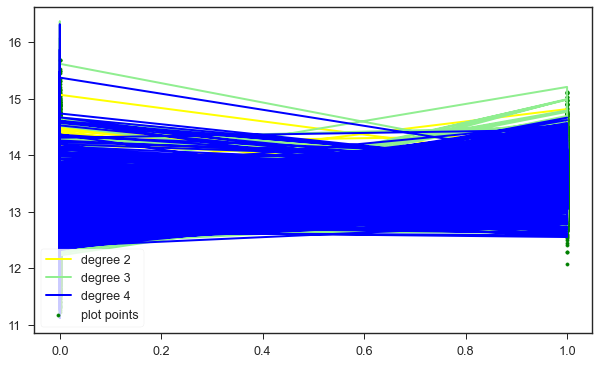

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(features[selected_columns[2]], features['log_price'], color='green', s=50, marker='.', label='plot points')

# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train[selected_columns])
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Transform the test data into polynomial features
    X_poly_test = poly.transform(X_test[selected_columns])
    
    # Get predicted values for transformed polynomial test data  
    y_pred = reg_poly.predict(X_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    # Transform the full data
    X_poly = poly.transform(features[selected_columns])
    
    # Now, we want to see what the model predicts for the entire data  
    y_poly = reg_poly.predict(X_poly)
    
    # Create plot of predicted values
    plt.plot(features[selected_columns[2]], y_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    plt.legend(loc='lower left')

In [66]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=features_list)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=features_list)

In [ ]:
final_scaler = scaler.fit(X_train)

In [ ]:
final_scaler = StandardScaler()
final_scaler = final_scaler.fit(features_only)

In [ ]:
final_scaler

In [ ]:
import pickle
# Save
with open('final_scaler.pickle', 'wb') as f:
    pickle.dump(final_scaler, f)

## "Standard" model

In [67]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = np.exp(lm.predict(X_train))

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

y_pred = np.exp(lm.predict(X_test))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Training Root Mean Squared Error: 631907.0888347679


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

In [ ]:
standard_regression = LinearRegression()
standard_regression = standard_regression.fit(features_only, target)

In [ ]:

with open('standard_regression_model.pickle', 'wb') as f:
    pickle.dump(standard_regression, f)

## F-Test

In [68]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=9)

selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
k_selector = SelectKBest(f_regression, k=9)
k_selector.fit(features_only, target)

In [ ]:
with open('k_selector.pickle', 'wb') as f:
    pickle.dump(k_selector, f)

In [ ]:
selected_columns_full = features_only.columns[k_selector.get_support()]
selected_columns_full

In [71]:
selected_columns

Index(['log_living_bed_ratio', 'log_sqft_living', 'bathrooms_3_half',
       'grade_6', 'grade_7', 'grade_9', 'grade_10', 'view_grade_6',
       'view_grade_7'],
      dtype='object')

In [69]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = np.exp(lm_kbest.predict(X_train[selected_columns]))


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = np.exp(lm_kbest.predict(X_test[selected_columns]))

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

Training Root Mean Squared Error: 543865.2605498491
Testing Root Mean Squared Error: 533659.776987212
Original:  630466.559674813 vs. KBest:  533659.776987212


In [ ]:
sns.residplot( y_test, y_kbest, lowess=True, color="g")

In [ ]:
kbest_regression = LinearRegression()
kbest_regression = kbest_regression.fit(features_only[selected_columns_full], target)

In [ ]:

with open('kbest_regression.pickle', 'wb') as f:
    pickle.dump(kbest_regression, f)

In [ ]:
f_list_selected = '+'.join(features[selected_columns].columns)
f_selected = 'log_price~' + f_list_selected
model_selected = ols(formula=f_selected, data=features).fit()
model_selected.summary()

## Recursive Feature Elimination

In [ ]:
from sklearn import linear_model
from sklearn.feature_selection import RFECV

rfe = linear_model.LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=rfe, step=1, cv=10, scoring='neg_mean_squared_error')
# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [ ]:
selected_rfe

In [ ]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = np.exp(lm_rfe.predict(X_train[selected_rfe]))


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = np.exp(lm_rfe.predict(X_test[selected_rfe]))

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse)

## LASSO

In [ ]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.75, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred_lasso = np.exp(lasso.predict(X_train))
y_pred_lasso = np.exp(lasso.predict(X_test))

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [ ]:
lasso_full = Lasso(alpha=.05, normalize=False)
lasso_full = lasso_full.fit(features_only, target)

In [ ]:
with open('lasso_full.pickle', 'wb') as f:
    pickle.dump(lasso_full, f)

In [ ]:
len(coefficient[coefficient[0] != 0])

In [ ]:
coefficient = lasso_coef01.T
coefficient[coefficient[0] != 0]

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_train.iloc[:,:44].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
sns.residplot( y_test, y_train_pred_lasso,lowess=True, color="g")

In [ ]:
sns.residplot( y_test, y_pred_lasso, lowess=True, color="g")

In [ ]:
features['log_sqft_living'].corr(features['log_living_bed_ratio'])

In [ ]:
features['log_sqft_living'].corr(features['view_grade'])

# FITTING TO FULL DATA

In [ ]:
final_scaler = StandardScaler()
final_scaler.fit_transform(features[selected_columns])

In [ ]:
final_model = LinearRegression()
final_model.fit(features[selected_columns], target)

## POLYNOMIALS??

In [ ]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [ ]:
create_polynomial_regression_model(3)

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train[['']])

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_train, y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
X_train, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [ ]:
features.columns[0:20]

In [ ]:
features.columns[20:46]